In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from vpython import*
scene = canvas()

<IPython.core.display.Javascript object>

RuntimeError: Requested MovieWriter (ffmpeg) not available

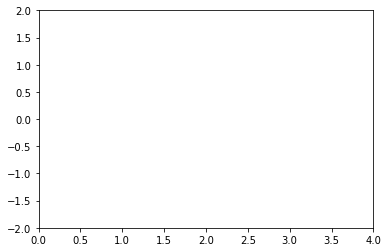

In [12]:
n = 1000
T = 1.0

fig = plt.figure()
ax = plt.axes(xlim=(0,4), ylim=(-2,2))
line, = ax.plot([], [], lw=3)
xaxis = np.linspace(0.0, T, n)

dT = xaxis[1] - xaxis[0]
dX = np.sqrt(dT) * np.random.randn(1, n)
dY = np.sqrt(dT) * np.random.randn(1, n)

def init():
    line.set_data([], [])
    return line,
def animate():
    X = np.cumsum(dX,axis = 1)
    Y = np.cumsum(dY, axis = 1)
    line.set_data(X, Y)
    return line,


anim = FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=True)

FFMpefwriter = animation.writers['ffmpeg']
writer = animation.FFMpegwriter()

anim.save("Brownian.mp4", writer=writer)
plt.plot(X[0,:], Y[0,:])
plt.show()



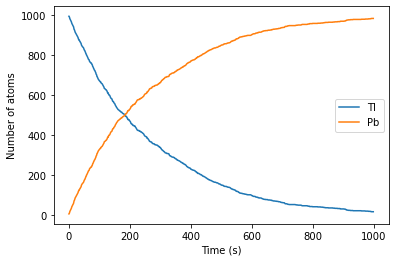

In [8]:
tau = 3.053*60

N_atom = 1000  
N_time = 1000   
mu = np.log(2)/tau
N_Pb = np.zeros([N_time-1])   
N_Tl = N_atom * np.ones([N_time-1])  

for i in range(N_atom):    
    z0 = np.random.random()
    x0 = int(-np.log(1-z0)/mu) 
    if x0<N_time:     
        N_Pb[x0:] += 1  
        N_Tl[x0:] -= 1  
        
plt.plot(N_Tl, label='Tl')
plt.plot(N_Pb, label='Pb')
plt.xlabel("Time (s)")
plt.ylabel("Number of atoms")

plt.legend()
plt.show()